# Определение перспективного тарифа для телеком-компании

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Описание тарифов
### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import os

<a id="(#start)"></a>
## Шаг 1. Откройте файл с данными и изучите общую информацию 


In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')

In [3]:
def rewiev(row):
    print('info')
    display(row.info())
    print('----------------------------------------------------')
    print('head')
    display(row.head())
    print('----------------------------------------------------')
    print('isna')      
    display(row.isna().sum())
    print('----------------------------------------------------')
    print('describe')      
    display(row.describe())
    print('----------------------------------------------------')
    return

In [4]:
rewiev(calls)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

----------------------------------------------------
head


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


----------------------------------------------------
isna


id           0
call_date    0
duration     0
user_id      0
dtype: int64

----------------------------------------------------
describe


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


----------------------------------------------------


Пропусков нет\
call_date нужно впривести к типу datetime\
В остальном выглядит нормально

In [5]:
rewiev(internet)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

----------------------------------------------------
head


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


----------------------------------------------------
isna


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

----------------------------------------------------
describe


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


----------------------------------------------------


Пропусков нет\
session_date нужно привести к типу datetime\
Unnamed: 0 лишний столбец равный индексу, нужно удалить

In [6]:
rewiev(messages)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

----------------------------------------------------
head


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


----------------------------------------------------
isna


id              0
message_date    0
user_id         0
dtype: int64

----------------------------------------------------
describe


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


----------------------------------------------------


Пропусков нет\
message_date нужно привести к типу datetame\

In [7]:
rewiev(tariffs)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

----------------------------------------------------
head


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


----------------------------------------------------
isna


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

----------------------------------------------------
describe


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


----------------------------------------------------


Пропусков нет\
Визуально все ок

In [8]:
rewiev(users)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

----------------------------------------------------
head


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


----------------------------------------------------
isna


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

----------------------------------------------------
describe


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


----------------------------------------------------


Есть пропуски в churn_date, но это значит только что клиент на момент выгрузки пользуется тарифом\
reg_date и churn_date нужно привести к типу datetime

## Шаг 2. Подготовьте данные

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'])#тип datetime
internet = internet.drop(['Unnamed: 0'],axis=1)#удаление колонки
internet['session_date'] = pd.to_datetime(internet['session_date'])#тип datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])#тип datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])#тип datetime
users['churn_date'] = pd.to_datetime(users['churn_date'])#тип datetime

В таблице internet была лишняя колонка Unnamed: 0 равная индексу, удалил.\
Колонки с датами приведены к типу datetime

In [10]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [11]:
#округление длительности звонка в большую сторону
calls['duration'] = np.ceil(calls['duration'])

In [12]:
calls['duration'] = pd.to_numeric(calls['duration'])

In [13]:
df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')

# df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_calls['duration'] = np.ceil(df_calls['duration'])

In [14]:
df_calls['duration'] = np.ceil(df_calls['duration'])

In [15]:
df_calls['duration_2'] = calls['duration']
df_calls['del'] = df_calls['duration'] - df_calls['duration_2']
df_calls.sort_values('del')

,id,call_date,duration,user_id,duration_2,del
0,1000_0,2018-07-25,0.0,1000,0.0,0.0
135066,1344_883,2018-09-07,5.0,1344,5.0,0.0
135067,1344_884,2018-12-09,20.0,1344,20.0,0.0
135068,1344_885,2018-05-05,0.0,1344,0.0,0.0
135069,1344_886,2018-11-25,14.0,1344,14.0,0.0
...,...,...,...,...,...,...
67538,1171_563,2018-05-05,4.0,1171,4.0,0.0
67539,1171_564,2018-04-13,10.0,1171,10.0,0.0
67540,1171_565,2018-10-18,18.0,1171,18.0,0.0
67542,1171_567,2018-09-21,9.0,1171,9.0,0.0


In [16]:
round(15.0 + 0.5)

16

### Посчитайте для каждого пользователя:

#### количество сделанных звонков и израсходованных минут разговора по месяцам;

In [17]:
calls['month'] = calls['call_date'].dt.month

In [18]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [19]:
user_calls = calls.groupby(['user_id','month']).agg({'duration' : 'sum', 'id': 'count'}).reset_index().rename(columns={'duration' : 'month_calls_duration','id':'calls_total_month'})

In [20]:
user_calls

,user_id,month,month_calls_duration,calls_total_month
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


#### количество отправленных сообщений по месяцам;

In [21]:
messages['month'] = messages['message_date'].dt.month

In [22]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [23]:
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_month'})

In [24]:
user_messages

,user_id,month,sms_total_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### объем израсходованного интернет-трафика по месяцам;

In [25]:
internet['month'] = internet['session_date'].dt.month

In [26]:
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [27]:
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_month'})

In [28]:
user_internet

,user_id,month,mb_total_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


#### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [29]:
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [30]:
df

,user_id,month,month_calls_duration,calls_total_month,sms_total_month
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [31]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')

In [32]:
df

,user_id,month,month_calls_duration,calls_total_month,sms_total_month,mb_total_month
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


In [33]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_month,sms_total_month,mb_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [34]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [35]:
df = df.merge(tariffs, on='tariff', how='left')

In [36]:
df

,user_id,month,month_calls_duration,calls_total_month,sms_total_month,mb_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17322.51,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [37]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_month          40
sms_total_month           497
mb_total_month             11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [38]:
# заполняем тех кто не расходует минуты,смс,гб нулями
df['sms_total_month'] = df['sms_total_month'].fillna(0)
df['mb_total_month'] = df['mb_total_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_month'] = df['calls_total_month'].fillna(0)

In [39]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_month           0
sms_total_month             0
mb_total_month              0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [40]:
def cost_the_tariff(row):
    sms = (row['sms_total_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = mt.ceil((row['mb_total_month'] - row['mb_per_month_included'])/ 1024) * row['rub_per_gb']
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [41]:
df['cost_the_tariff'] = df.apply(lambda x: cost_the_tariff(x), axis=1)

In [42]:
df['total_paid'] = df['rub_monthly_fee'] + df['cost_the_tariff']

In [43]:
df

,user_id,month,month_calls_duration,calls_total_month,sms_total_month,mb_total_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_the_tariff,total_paid
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,400.0,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,1000.0,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,600.0,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,400.0,950.0


Есть клиенты которые не пользуются смс или интернет трафиком или звонками, возможно есть смысл предложить тарифы с учетом этих особенностей.

## Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

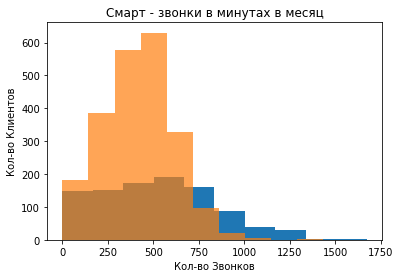

In [44]:
fig, ax = plt.subplots()

df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10,title='Ультра - звонки в минутах в месяц',ylabel='Количество звонков')
df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10,title='Смарт - звонки в минутах в месяц',ylabel='Количество звонков',alpha=0.7)

ax.set_xlabel('Кол-во Звонков')
ax.set_ylabel('Кол-во Клиентов')
plt.show()


In [45]:
#df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10,title='Смарт - звонки в минутах в месяц',range=(0,1750))
#plt.show()

In [46]:
df.groupby('tariff').agg({'month_calls_duration':['median','mean','var','std']})

month_calls_duration                                       
                     median        mean            var         std
tariff                                                            
smart                 422.0  417.934948   36219.315784  190.313730
ultra                 518.0  526.623350  100873.633397  317.606098

В среднем пользователи тарифа Смарт выговаривают 420 минут в месяц и у них остается еще 80 минут не израсходованных, пользователи тарифа Ультра выговаривают в среднем 530 минут в месяц и у них остается 2470 минут в месяц. Средняя и медиана находятся рядом.

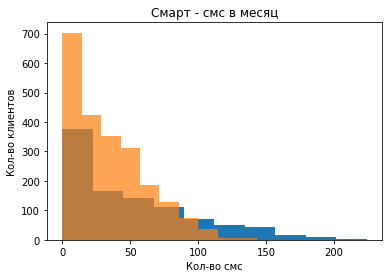

In [47]:
fig, ax = plt.subplots()


df[df['tariff'] == 'ultra']['sms_total_month'].plot(kind='hist', bins=10,title='Ультра - смс в месяц')
df[df['tariff'] == 'smart']['sms_total_month'].plot(kind='hist', bins=10,title='Смарт - смс в месяц',alpha=0.7)

ax.set_xlabel('Кол-во смс')
ax.set_ylabel('Кол-во клиентов')
plt.show()

In [48]:
#df[df['tariff'] == 'smart']['sms_total_month'].plot(kind='hist', bins=10,title='Смарт - смс в месяц')

In [49]:
df.groupby('tariff').agg({'sms_total_month':['median','mean','var','std']})

sms_total_month                                   
                median       mean          var        std
tariff                                                   
smart             28.0  33.384029   796.812958  28.227876
ultra             38.0  49.363452  2285.266143  47.804457

Смс не полюзуется спросом, оно и понятно век смс прошел)

In [50]:
df_sms_smart = df[df['tariff'] == 'smart']
print(df_sms_smart[df_sms_smart['sms_total_month']>50]['user_id'].count()/df_sms_smart['user_id'].count())

0.253028263795424


25% клиентов смарт не вкладываются в 50 смс в месяц)

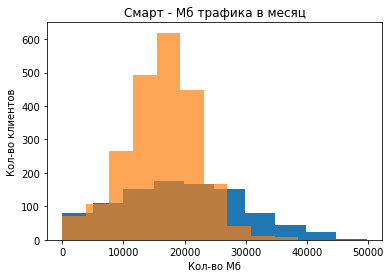

In [51]:
fig, ax = plt.subplots()

df[df['tariff'] == 'ultra']['mb_total_month'].plot(kind='hist', bins=10,title='Ультра - Мб трафика в месяц')
df[df['tariff'] == 'smart']['mb_total_month'].plot(kind='hist', bins=10,title='Смарт - Мб трафика в месяц',alpha=0.7)

ax.set_xlabel('Кол-во Мб')
ax.set_ylabel('Кол-во клиентов')
plt.show()

In [52]:
#df[df['tariff'] == 'smart']['mb_total_month'].plot(kind='hist', bins=10,title='Смарт - Мб трафика в месяц')

In [53]:
df.groupby('tariff').agg({'mb_total_month':['median','mean','var','std']})

mb_total_month                                          
               median          mean           var           std
tariff                                                         
smart        16506.84  16208.386990  3.446250e+07   5870.476681
ultra        19308.01  19468.805208  1.017510e+08  10087.170752

Клиенты тарифа смарт в среднем немного вылезают за пределы включенных Гб трафика, клиенты тарифа Ультра наоборот имеют в среднем запас в 10 Гб. Так же в среднем клиенты тарифа смарт потребляют больше интернет траффика.

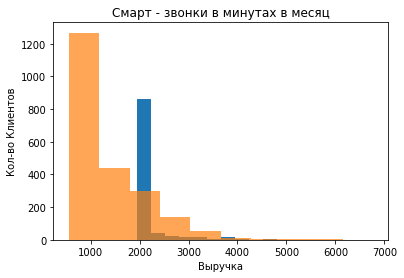

In [54]:
fig, ax = plt.subplots()

df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10,title='Ультра - звонки в минутах в месяц',ylabel='Количество звонков')
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10,title='Смарт - звонки в минутах в месяц',ylabel='Количество звонков',alpha=0.7)

ax.set_xlabel('Выручка')
ax.set_ylabel('Кол-во Клиентов')
plt.show()


In [55]:
df.groupby('tariff').agg({'total_paid':['median','mean','var','std','sum','count']})

total_paid                                                         
           median         mean            var         std        sum count
tariff                                                                    
smart      1023.0  1289.973531  669785.708006  818.404367  2875351.0  2229
ultra      1950.0  2070.152284  141516.745079  376.187114  2039100.0   985

Каждый пользователь тарифа смарт приносит в среднем в 2 раза меньше выручки чем пользователь тарифа ультра, но так как пользователей тарифа смарт больше в данной выборке, то они приносят в сумме больше выручки чем пользователи тарифа ультра.

## Шаг 4. Проверьте гипотезы
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;\
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.\
Пороговое значение alpha задайте самостоятельно.\
Поясните:\
как вы формулировали нулевую и альтернативную гипотезы;\
какой критерий использовали для проверки гипотез и почему.\

In [56]:
def delete_outliers(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    return df.loc[iqr_test]

Используем t-критерий Стьюдента, потому что выборки не зависимы
### Проверка гипотезы:
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются\
H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается\
H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [57]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [58]:
ultra = delete_outliers(ultra, 'total_paid')
ultra = ultra['total_paid']

In [59]:
smart = delete_outliers(smart, 'total_paid')
smart = smart['total_paid']

In [60]:
alpha = 0.05

In [61]:
results = st.ttest_ind(ultra, smart)

In [62]:
smart.mean()

1246.1583257506825

In [63]:
ultra.mean()

1950.0

In [64]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.199325734910118e-155
Отвергаем нулевую гипотезу


Разница между выручкой пользователей тарифа Смарт и Ультра не случайна, присутствуют значимые различия

### Проверка гипотезы: 
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.\
H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов\
H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [65]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Регионы')

In [66]:
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Регионы']

In [67]:
moscow = delete_outliers(moscow, 'total_paid')
moscow = moscow['total_paid']

In [68]:
province = delete_outliers(province, 'total_paid')
province = province['total_paid']

In [69]:
results = st.ttest_ind(moscow, province)

In [70]:
moscow.mean()

1524.595709570957

In [71]:
province.mean()

1489.6695178849145

In [72]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29404256281786195
Не получилось отвергнуть нулевую гипотезу


Вероятность получить такой результат равен 30%. Значимы различий нет.

## Шаг 5. Напишите общий вывод

Клиенты разных тарифов ведут себя по разному.\
В среднем тариф Ультра париносит больше хотя пользователи этого тарифа и ретко выходят за рамки предоплаченных услуг.\
Пользователи тарифа Смарт плятят меньше, но чаще уходят за рамки предоплаченных услуг и клиентов тарифа в целом больше.\
Для оператора выгоднее иметь максимум пользователей на тарифе смарт.